In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
import algorithms
import classifiers
import metrics

In [3]:
dataset_paths = ["../data/synthetic_dataset_1/", 
                 "../data/synthetic_dataset_2/", 
                 "../data/synthetic_dataset_3/",  
                 "../data/kepler/", 
                 "../data/iris/"]

In [4]:
def get_files_list(path):
    files = []
    for aname in os.listdir(path):
        if aname[-3:] == "csv": files.append(os.path.join(path, aname))
    return files

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Dataset:  ../data/synthetic_dataset_1/ 


File's path:  ../data/synthetic_dataset_1/sample_9.csv
Sample shape:  (20000, 4)


Time        X1        X2  Label
0     0 -2.152394  5.934555      0
1     1  1.157233  1.271434      0
2     2  3.688707  3.473376      0
3     3  1.653571  8.652372      0
4     4  0.298048  7.156938      0

Cahnge Point ROC AUC:  0.979047619047619


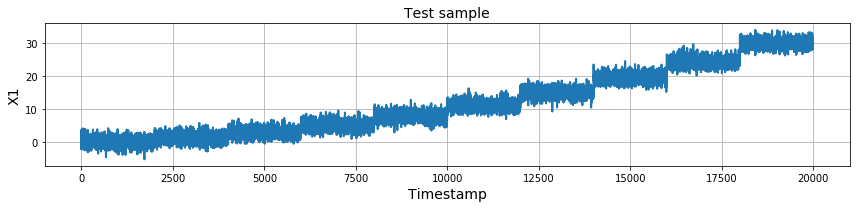

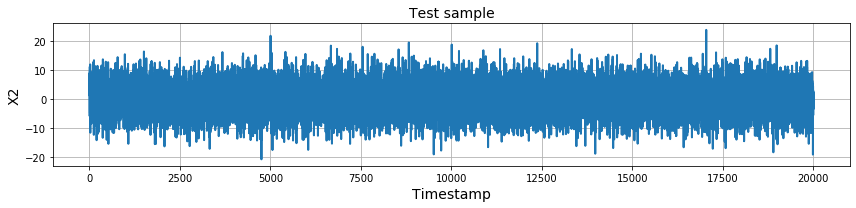

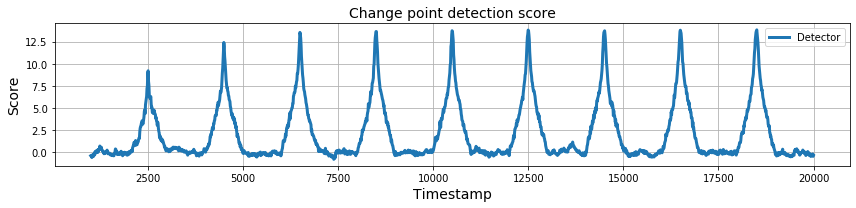

Dataset:  ../data/synthetic_dataset_2/ 


File's path:  ../data/synthetic_dataset_2/sample_9.csv
Sample shape:  (20000, 4)


Time        X1        X2  Label
0     0 -0.448492 -4.567171      0
1     1 -0.372600  4.275046      0
2     2  1.146793  5.203966      0
3     3 -0.764429  0.275962      0
4     4 -1.129645  1.428093      0

Cahnge Point ROC AUC:  0.9026739926739927


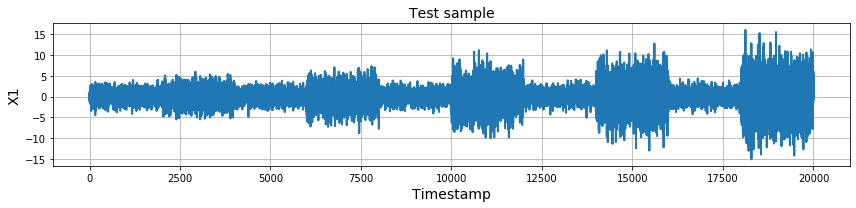

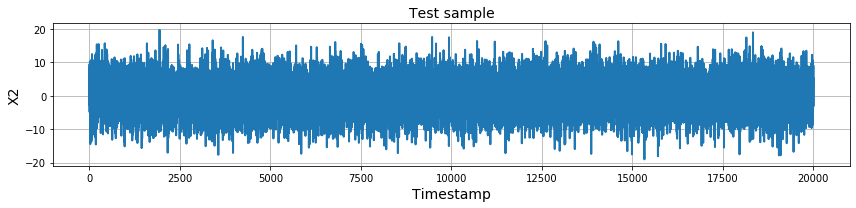

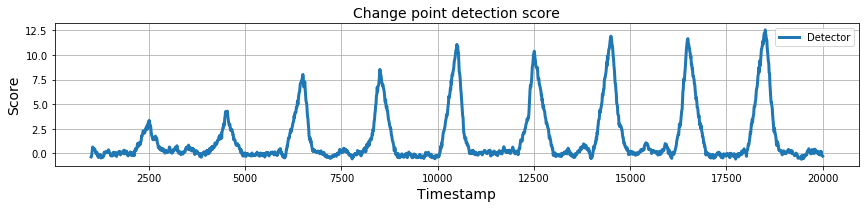

Dataset:  ../data/synthetic_dataset_3/ 


File's path:  ../data/synthetic_dataset_3/sample_9.csv
Sample shape:  (20000, 4)


Time        X1        X2  Label
0     0  2.122801 -2.644110      0
1     1 -1.363940 -2.108401      0
2     2  0.117907 -0.772518      0
3     3 -0.258293  0.292562      0
4     4 -0.313564  0.845915      0

Cahnge Point ROC AUC:  0.9593739593739594


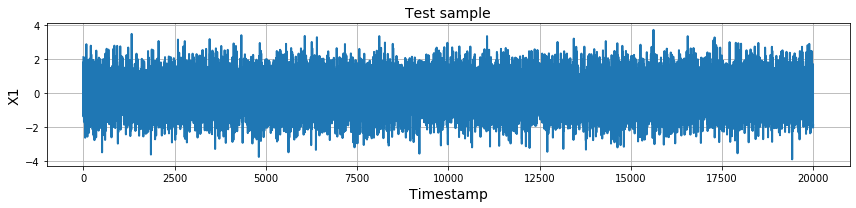

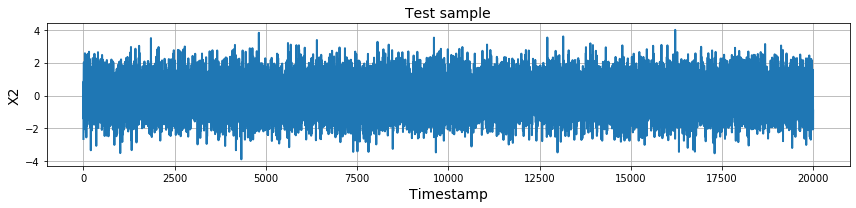

Dataset:  ../data/kepler/ 


File's path:  ../data/kepler/kepler_2617.csv
Sample shape:  (44100, 3)


Time          X1  Label
0     0  106757.125    0.0
1     1  106757.125    0.0
2     2  106667.890    0.0
3     3  106630.300    0.0
4     4  106559.555    0.0

Cahnge Point ROC AUC:  0.973657919748946


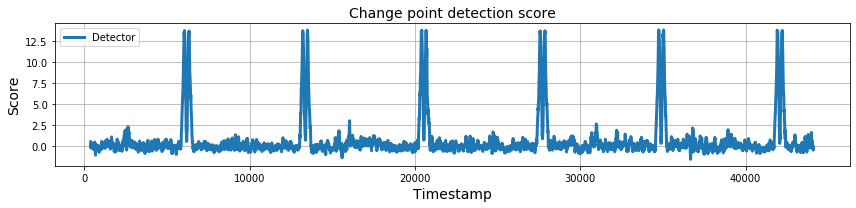

Dataset:  ../data/iris/ 


File's path:  ../data/iris/sample_9.csv
Sample shape:  (16201, 3)


Time           X1  Label
0     0  5323.983401    0.0
1     1  6396.868445    0.0
2     2  6258.212654    0.0
3     3  5552.653980    0.0
4     4  5975.048630    0.0

Cahnge Point ROC AUC:  0.9545601688951443


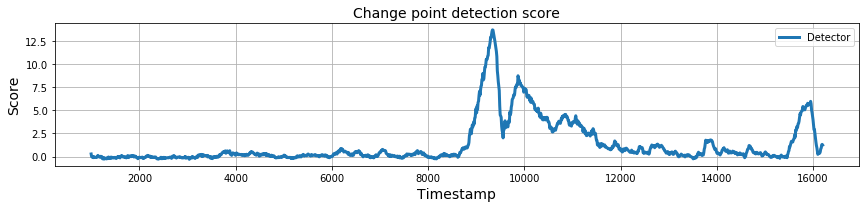

In [6]:
for apath in dataset_paths:
    
    print("Dataset: ", apath, "\n\n")
    files = get_files_list(apath)
    
    window_size = 500
    if apath == "../data/kepler/":
        window_size = 200
    
    for afile in files[-1:]:
        print("File's path: ", afile)
        
        # Read a sample
        data = pd.read_csv(afile, index_col=False)
        print("Sample shape: ", data.shape)
        display(data.head())
        
        label = data["Label"].values
        T     = data["Time"].values
        X     = data.drop(columns=["Time", "Label"]).values
        
        # Define a change point detector
        classifier = QuadraticDiscriminantAnalysis()
        detector   = algorithms.ChangePointDetectionClassifier(base_classifier=classifier, 
                                                               metric="KL_sym", 
                                                               periods=10, 
                                                               window_size=window_size, 
                                                               step=10, 
                                                               n_runs=1)
        
        # Detect change points
        T_score, score = detector.predict(X)
        
        # Calculate quality metrics
        auc = metrics.change_point_roc_auc(T, label, T_score, score, window_size)
        print("Cahnge Point ROC AUC: ", auc)
        
        
        # Display test sample
        for i in range(X.shape[1]):
            plt.figure(figsize=(12, 3.))
            plt.plot(T, X[:, i], linewidth=2)
            plt.xlabel('Timestamp', size=14)
            plt.ylabel('X'+str(i+1), size=14)
            plt.grid(b=1)
            plt.title('Test sample', size=14)
            plt.tight_layout()
            plt.show()


        # Display test sample
        plt.figure(figsize=(12, 3.))
        plt.plot(T_score, score, linewidth=3, label="Detector")
        plt.xlabel('Timestamp', size=14)
        plt.ylabel('Score', size=14)
        plt.grid(b=1)
        plt.title('Change point detection score', size=14)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()